<a href="https://colab.research.google.com/github/victorhcunha/ArvoreDeDecisao/blob/main/estruturadaarvorededecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
# Importando as bibliotecas necessárias:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz #arvoredeDecisao e #renderizacao
from sklearn.model_selection import train_test_split #divisaoDadosDeTeste
from sklearn import metrics
import numpy as np
# Renderização gráfica
import pydot
import graphviz
# Renderização interativa
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [320]:
# Carregando a base de dados:
data = pd.read_csv('iris.data')
data.head()

# Mostrando informações da base de dados:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [321]:

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(data.drop("class",axis=1),data["class"],test_size=0.3)

# Mostrando a forma dos dados:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(105, 4) (45, 4)
(105,) (45,)


In [322]:
# Arvore de decisão:
arvore = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2) #atributos da árvore
arvore.fit(X_train, y_train)

# Número de nós
n_nodes = arvore.tree_.node_count
print("Número de nós: {}".format(n_nodes))

Número de nós: 9


In [323]:
# Estrutura da árvore de decisão:
n_nodes = arvore.tree_.node_count
children_left = arvore.tree_.children_left
children_right = arvore.tree_.children_right
feature = arvore.tree_.feature
threshold = arvore.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    is_split_node = children_left[node_id] != children_right[node_id]

    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("A árvore binária tem {n} nodes e a "
      "seuinte estrutura:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}nó #{node} é um nó folha.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}nó #{node} (nó teste): "
              "vai para o {left} se o atributo {feature} <= {threshold} "
              "se não, vai para o nó {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=data.columns[feature[i]],
                  threshold=threshold[i],
                  right=children_right[i]))

A árvore binária tem 9 nodes e a seuinte estrutura:

nó #0 (nó teste): vai para o 1 se o atributo petal width in cm <= 0.800000011920929 se não, vai para o nó 2.
	nó #1 é um nó folha.
	nó #2 (nó teste): vai para o 3 se o atributo petal length in cm <= 4.8500001430511475 se não, vai para o nó 6.
		nó #3 (nó teste): vai para o 4 se o atributo sepal length in cm <= 5.200000047683716 se não, vai para o nó 5.
			nó #4 é um nó folha.
			nó #5 é um nó folha.
		nó #6 (nó teste): vai para o 7 se o atributo petal width in cm <= 1.75 se não, vai para o nó 8.
			nó #7 é um nó folha.
			nó #8 é um nó folha.


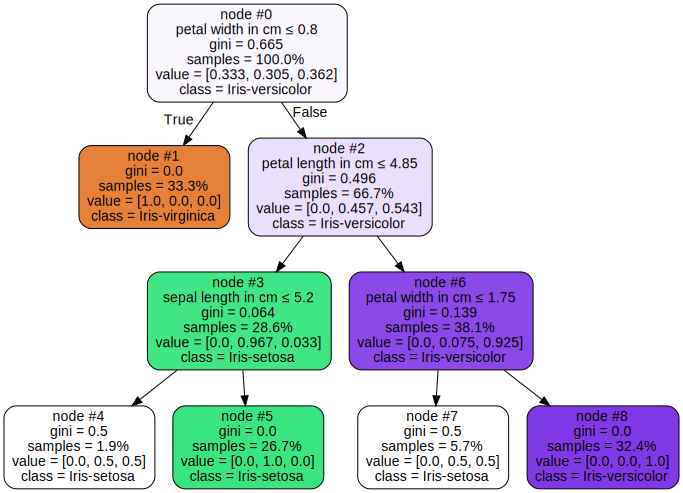

In [324]:
# Renderização de Árvore:
dot_data = export_graphviz( 
         arvore, 
         out_file=None,
         feature_names=data.drop('class',axis=1).columns,
         class_names=['Iris-virginica','Iris-setosa', 'Iris-versicolor'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )

graph = graphviz.Source(dot_data)  
graph

In [325]:
# Executando o método predict:
resultado = arvore.predict(X_test)
print(resultado)

# Relatório de métricas:
print(metrics.classification_report(y_test,resultado))

['Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor']
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.86      1.00      0.92        18
 Iris-virginica       1.00      0.75      0.86        12

       accuracy  